In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('../input/bike-sharing-demand/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [20]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

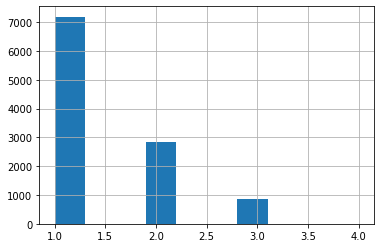

In [21]:
df.weather.hist()

In [22]:
df = df[df.weather != 4]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10885 non-null  object 
 1   season      10885 non-null  int64  
 2   holiday     10885 non-null  int64  
 3   workingday  10885 non-null  int64  
 4   weather     10885 non-null  int64  
 5   temp        10885 non-null  float64
 6   atemp       10885 non-null  float64
 7   humidity    10885 non-null  int64  
 8   windspeed   10885 non-null  float64
 9   casual      10885 non-null  int64  
 10  registered  10885 non-null  int64  
 11  count       10885 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [34]:
data = df.iloc[:,1:-1]
target = df['count']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   target,
                                                   test_size=0.2,
                                                   random_state=2022)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                   y_train,
                                                   test_size=0.2,
                                                   random_state=2022)

In [38]:
X_train.shape, X_test.shape, X_val.shape

((6966, 10), (2177, 10), (1742, 10))

In [39]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [41]:
model.score(X_test, y_test)

0.9996494089201534

In [42]:
def rmse(y_true, y_pred): 
    return np.sqrt(np.mean((y_true-y_pred)**2))

rmse(y_val, pred)

3.236681675166792

In [47]:
def rmse2(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse2(y_val, pred)

3.236681675166792

In [49]:
pred

array([ 32.07, 215.57,  86.03, ...,   8.  ,  56.57, 269.53])